# Project Name: Heart Attack Risk Prediction
### We will Make an app which will help us predict the risk of a Heart Attack a person have.
### We will do use various ML Models to predict the results.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/heart.csv")

In [ ]:
df= df.drop(['oldpeak','slp','thall'],axis=1)

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,0,1


### Understanding our DataSet:

### Age : Age of the patient

#### Sex : Sex of the patient

#### exang: exercise induced angina (1 = yes; 0 = no)

#### ca: number of major vessels (0-3)

#### cp : Chest Pain type chest pain type

- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

#### trtbps : resting blood pressure (in mm Hg)

#### chol : cholestoral in mg/dl fetched via BMI sensor

#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

#### rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

#### thalach : maximum heart rate achieved

#### target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.shape

(303, 11)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.181053,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.072042,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.213177,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.115739,-0.436757
caa,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,1.000000,-0.391724


<Axes: >

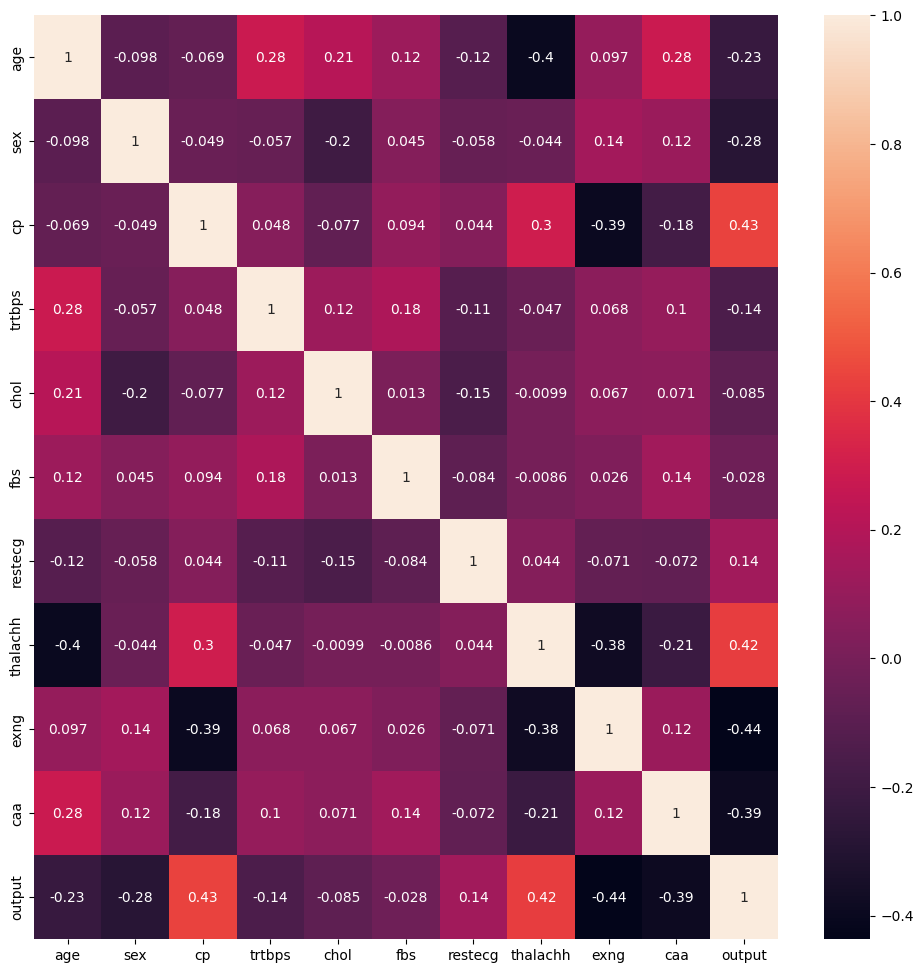

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

##variables not highly correlated

## We will perform Uni and Bi variate analysis on data

<Axes: title={'center': 'Age of Patients'}, xlabel='age', ylabel='count'>

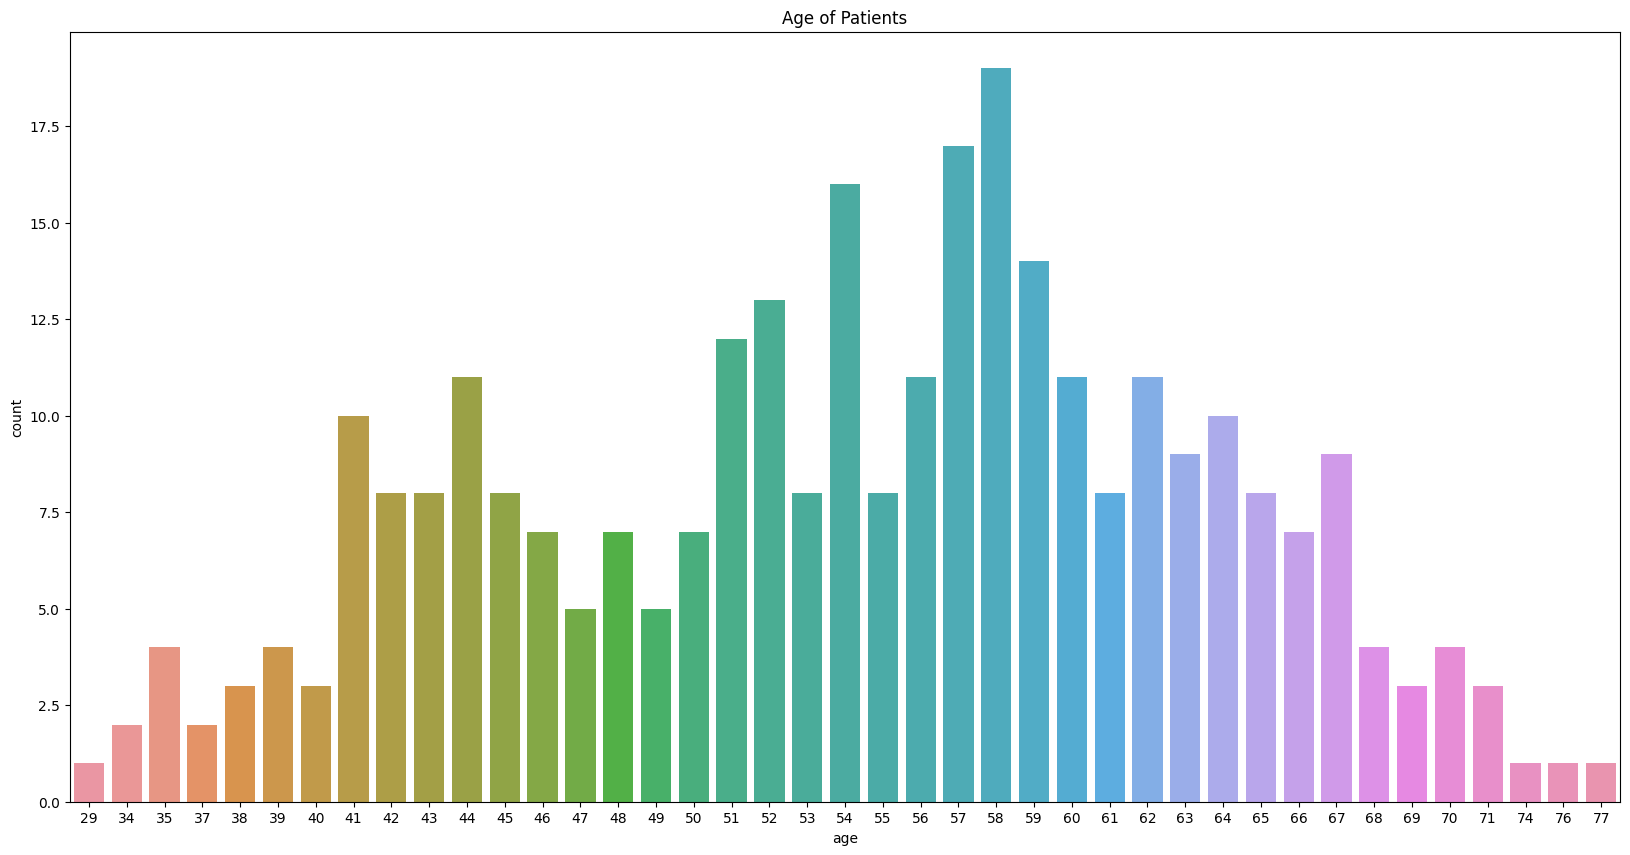

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df)

### majority is between age 50 and 70

<Axes: title={'center': 'Sex of Patients,1=Male and 0=Female'}, xlabel='sex', ylabel='count'>

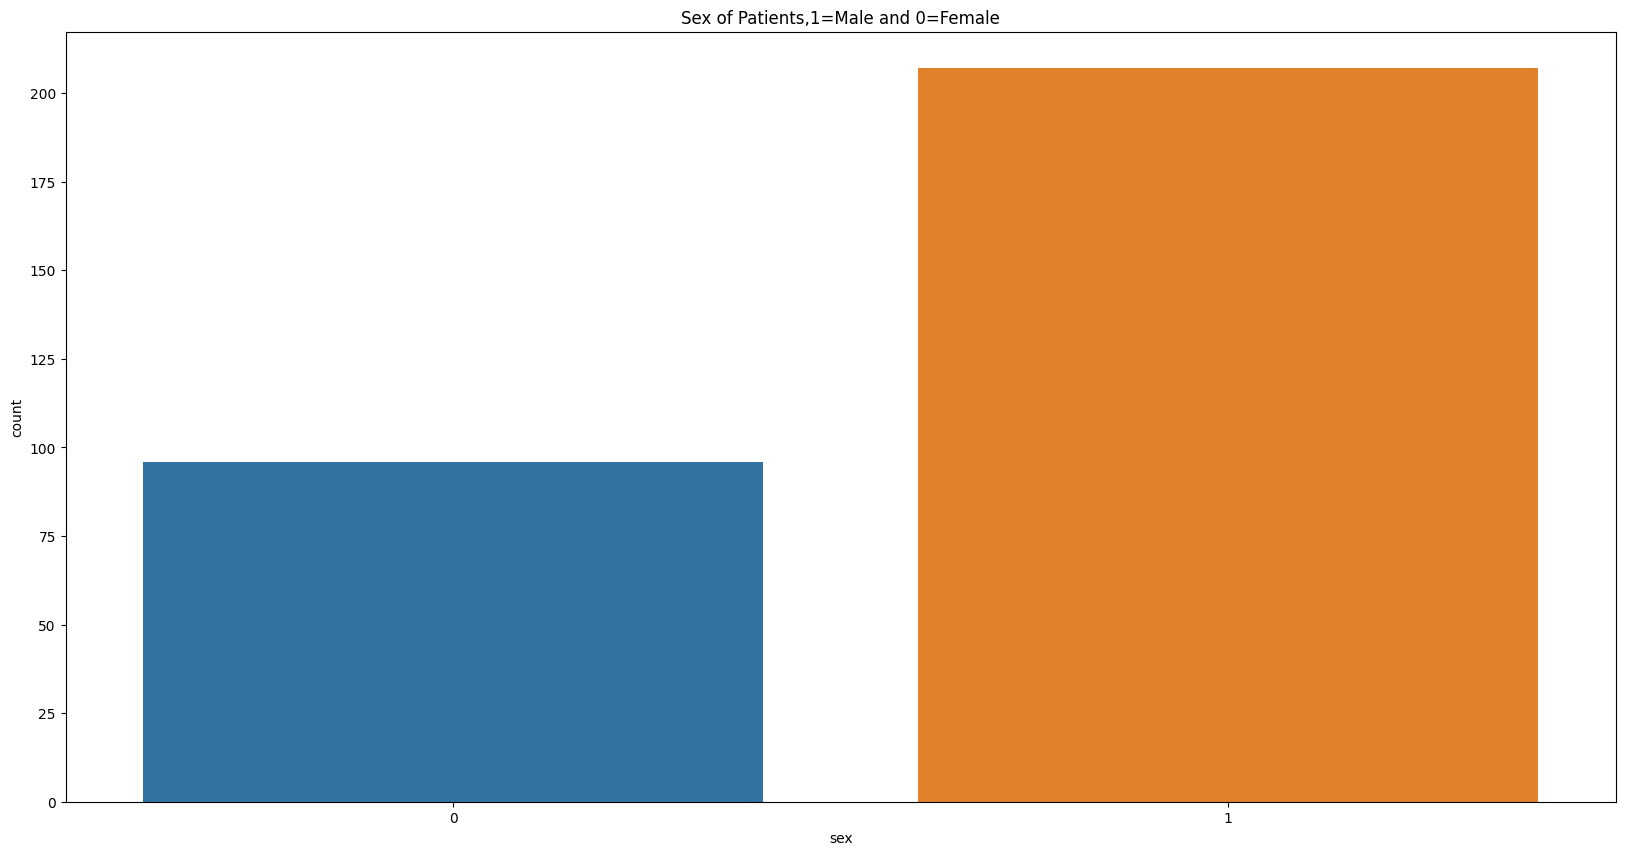

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Sex of Patients,1=Male and 0=Female")
sns.countplot(x='sex',data=df)

In [ ]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'
cp_data

,index,cp
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asymptomatic,23


<Axes: title={'center': 'Chest Pain in Patients'}, xlabel='index', ylabel='cp'>

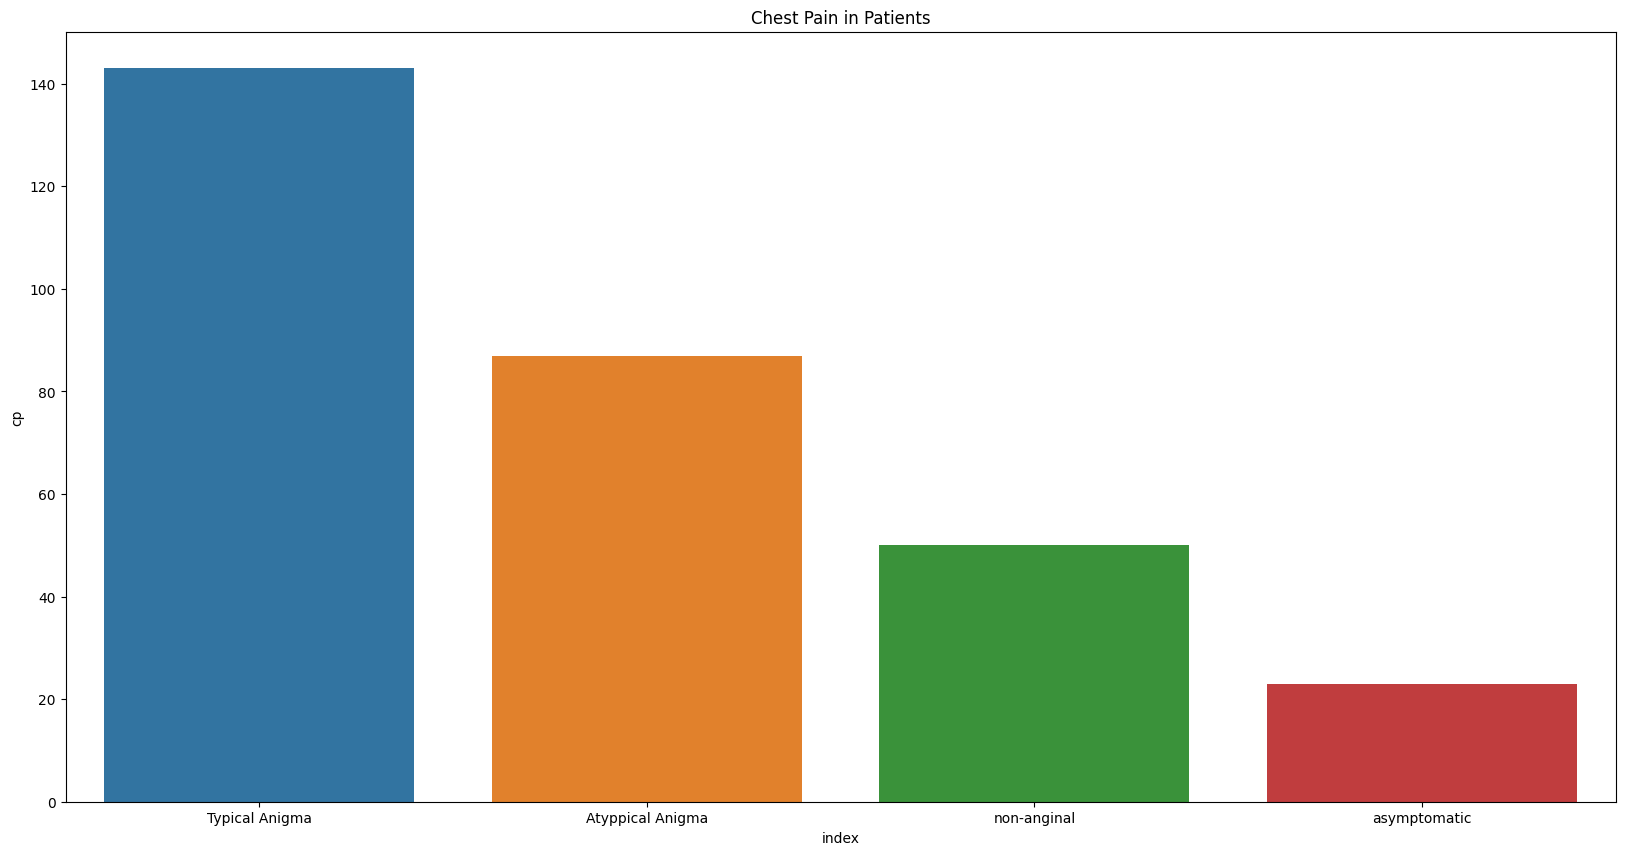

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("Chest Pain in Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp'])

In [ ]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

ecg_data

,index,restecg
0,normal,152
1,having ST-T wave abnormality,147
2,showing probable or definite left ventricular ...,4


<Axes: title={'center': 'ECG data of Patients'}, xlabel='index', ylabel='restecg'>

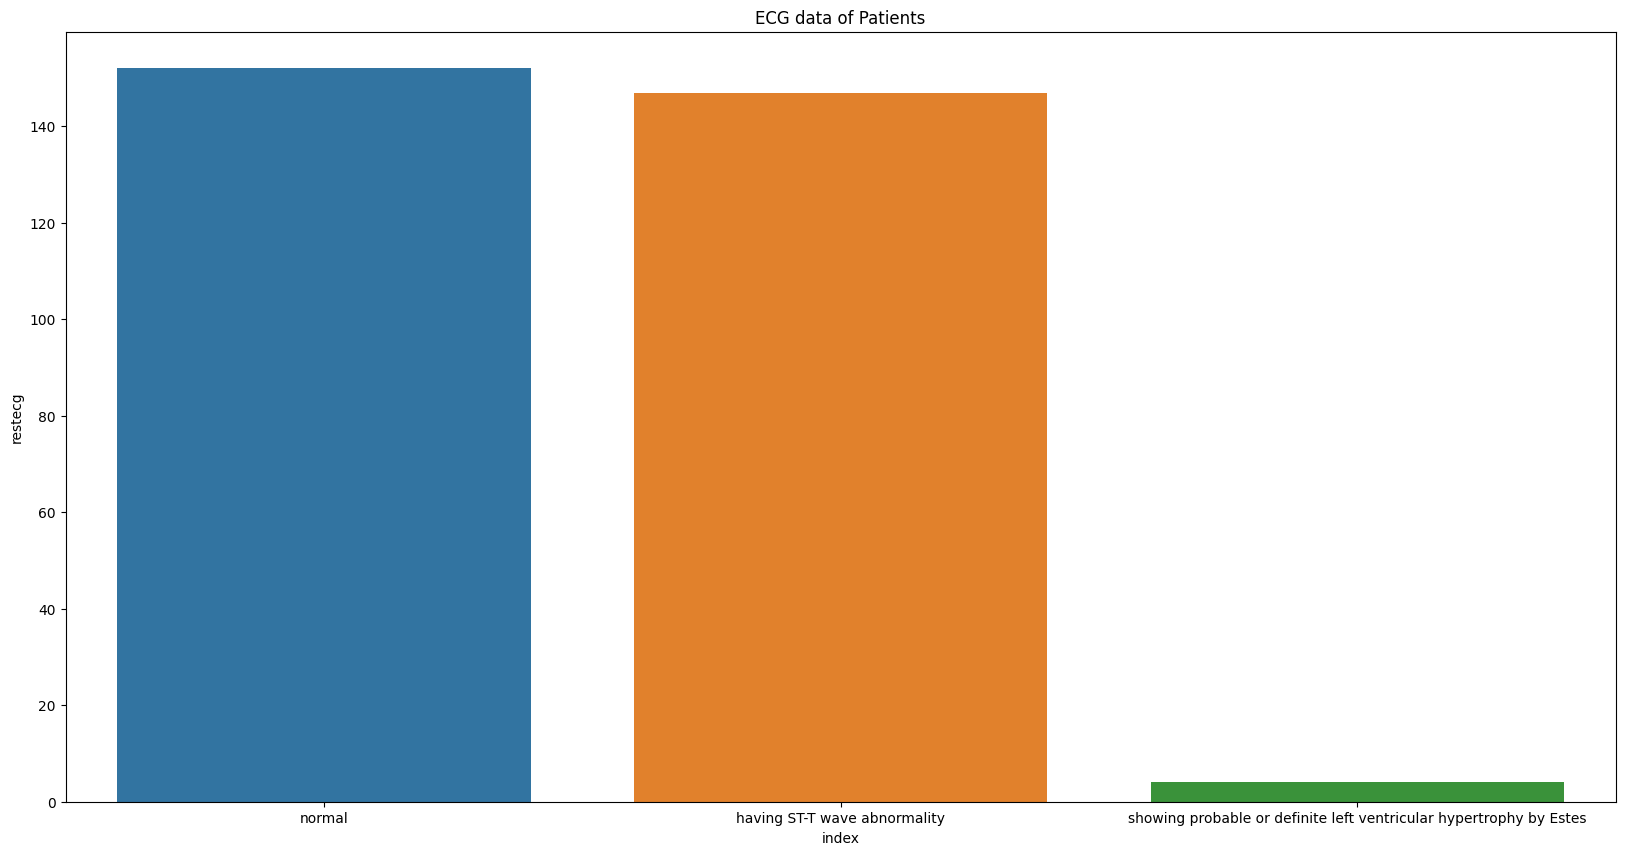

In [ ]:
plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")
sns.barplot(x=ecg_data['index'],y= ecg_data['restecg'])

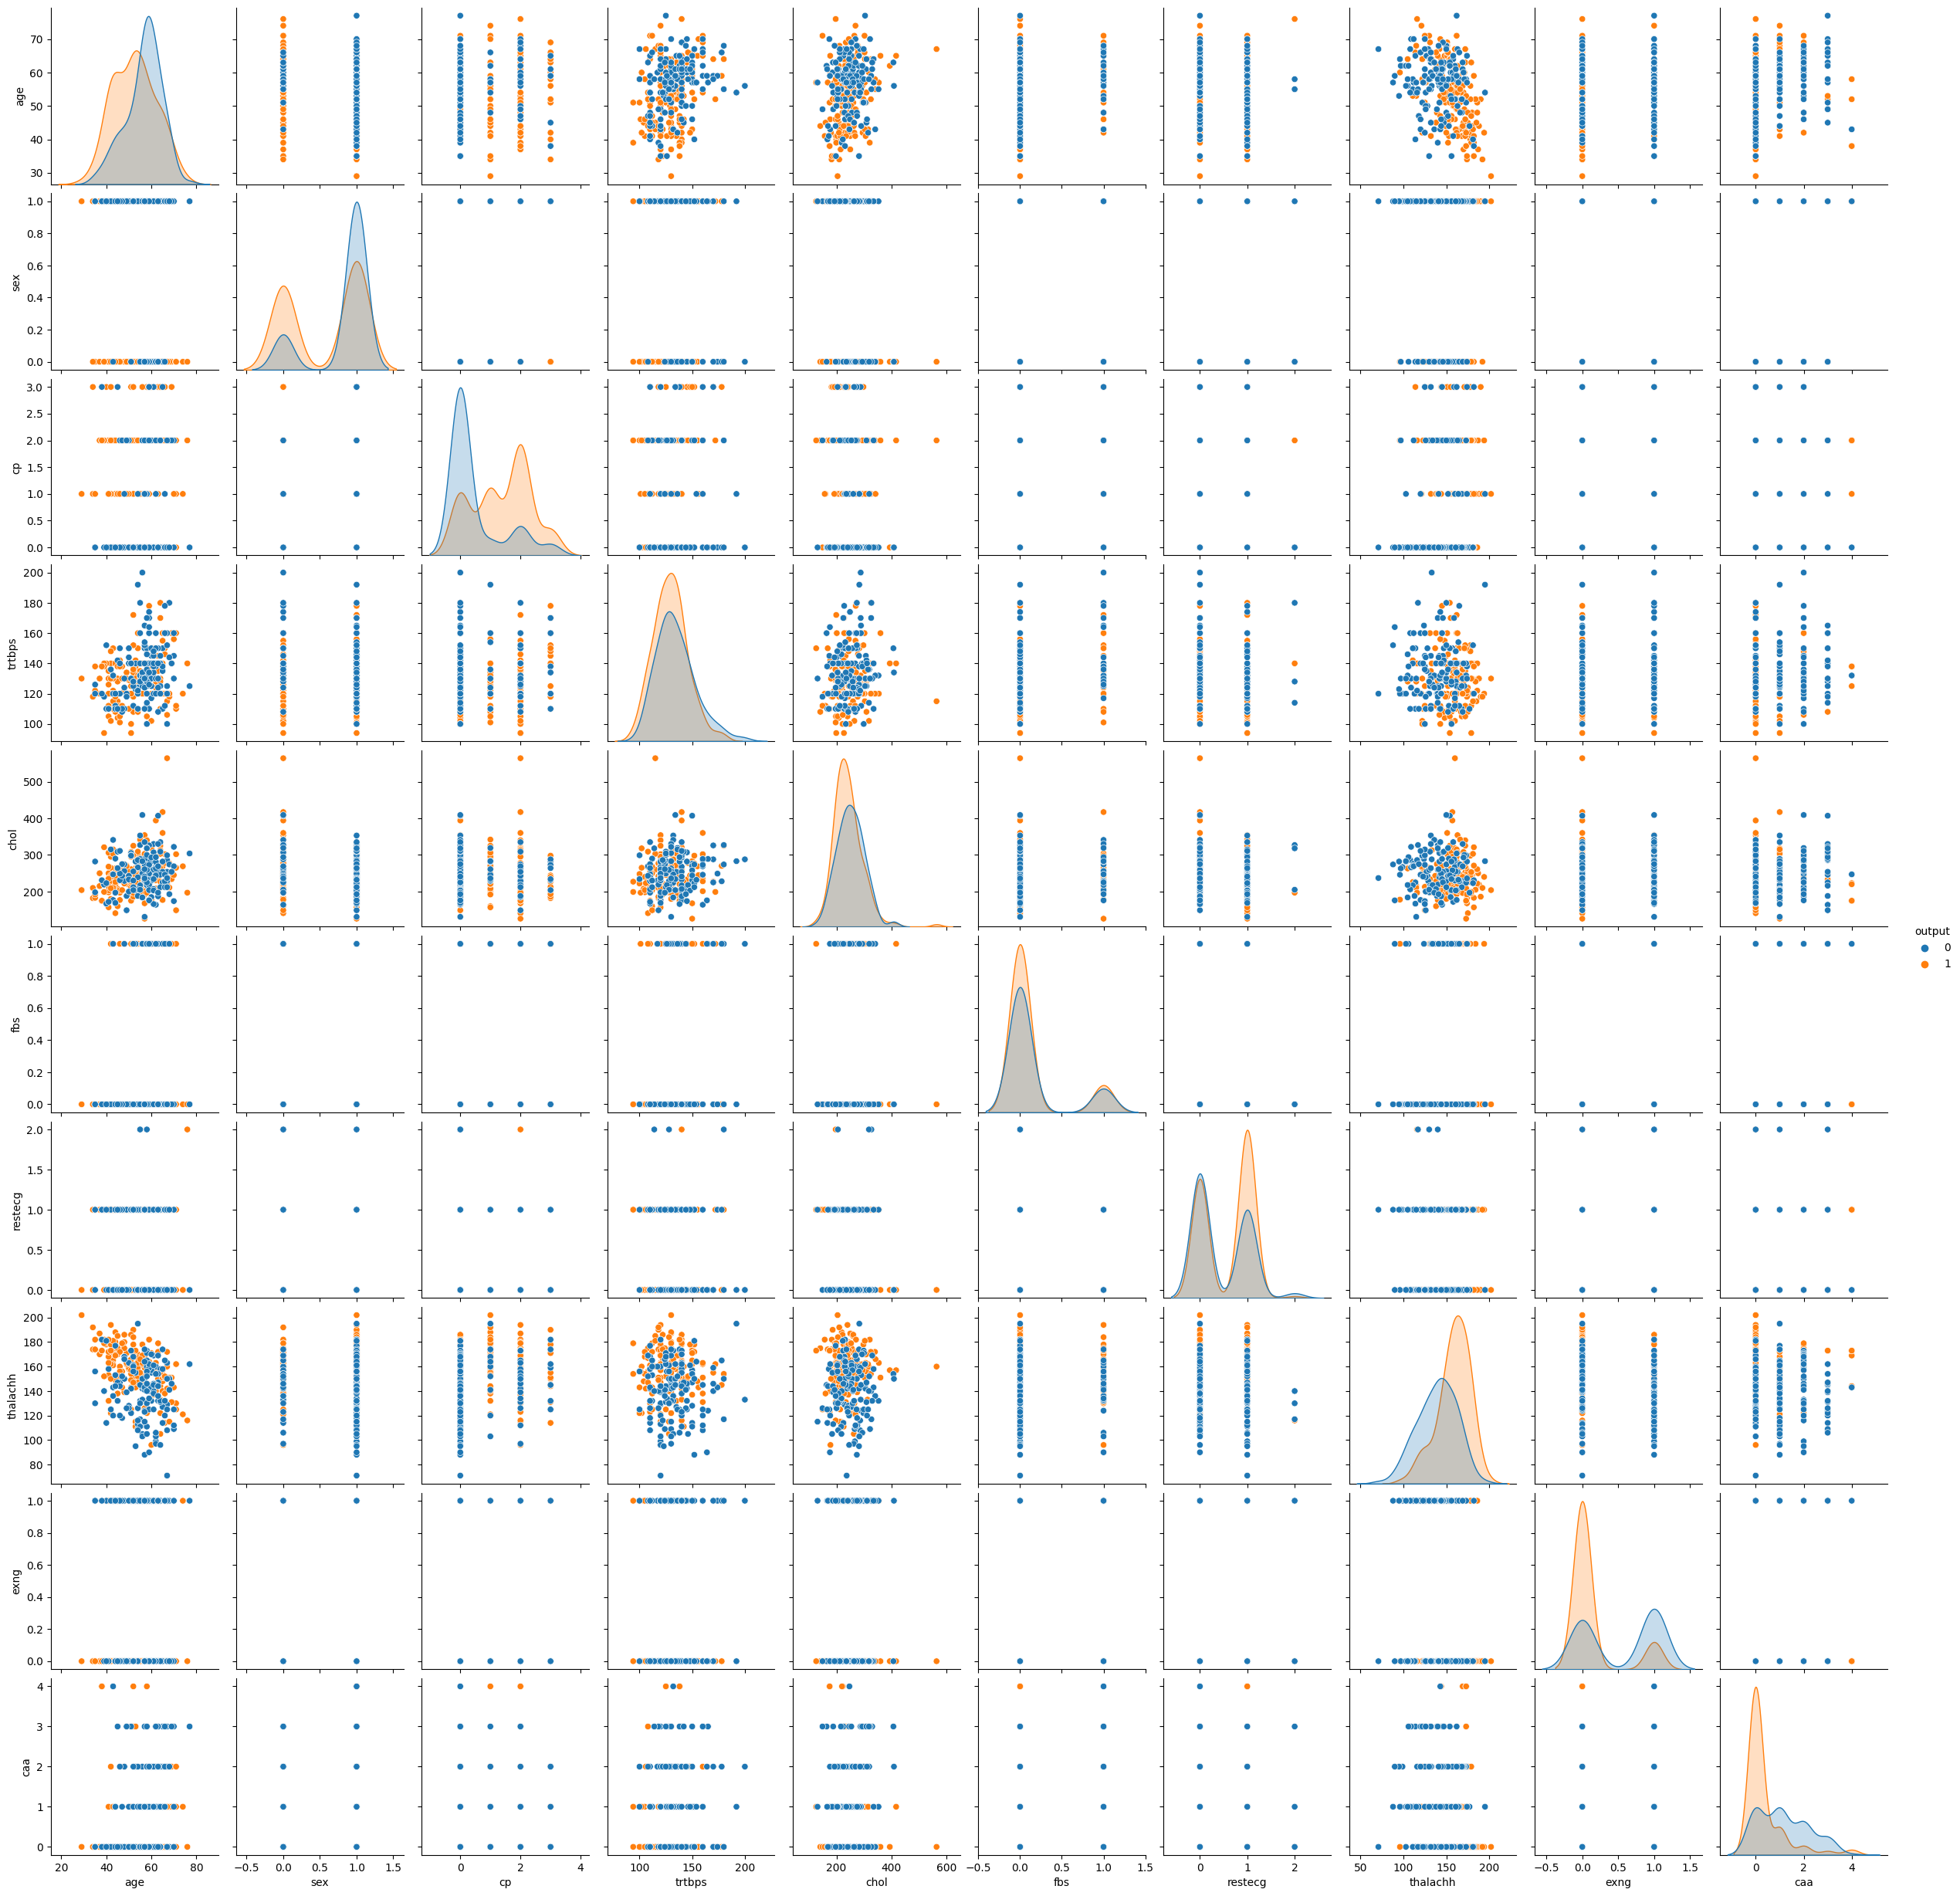

In [ ]:
#ecg data
sns.pairplot(df,hue='output')

<ipython-input-17-6e235d1019ae>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'], kde=True, color = 'magenta')
<ipython-input-17-6e235d1019ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'], kde=True, color = 'teal')


Text(0.5, 0, 'Maximum Heart Rate Achieved (bpm)')

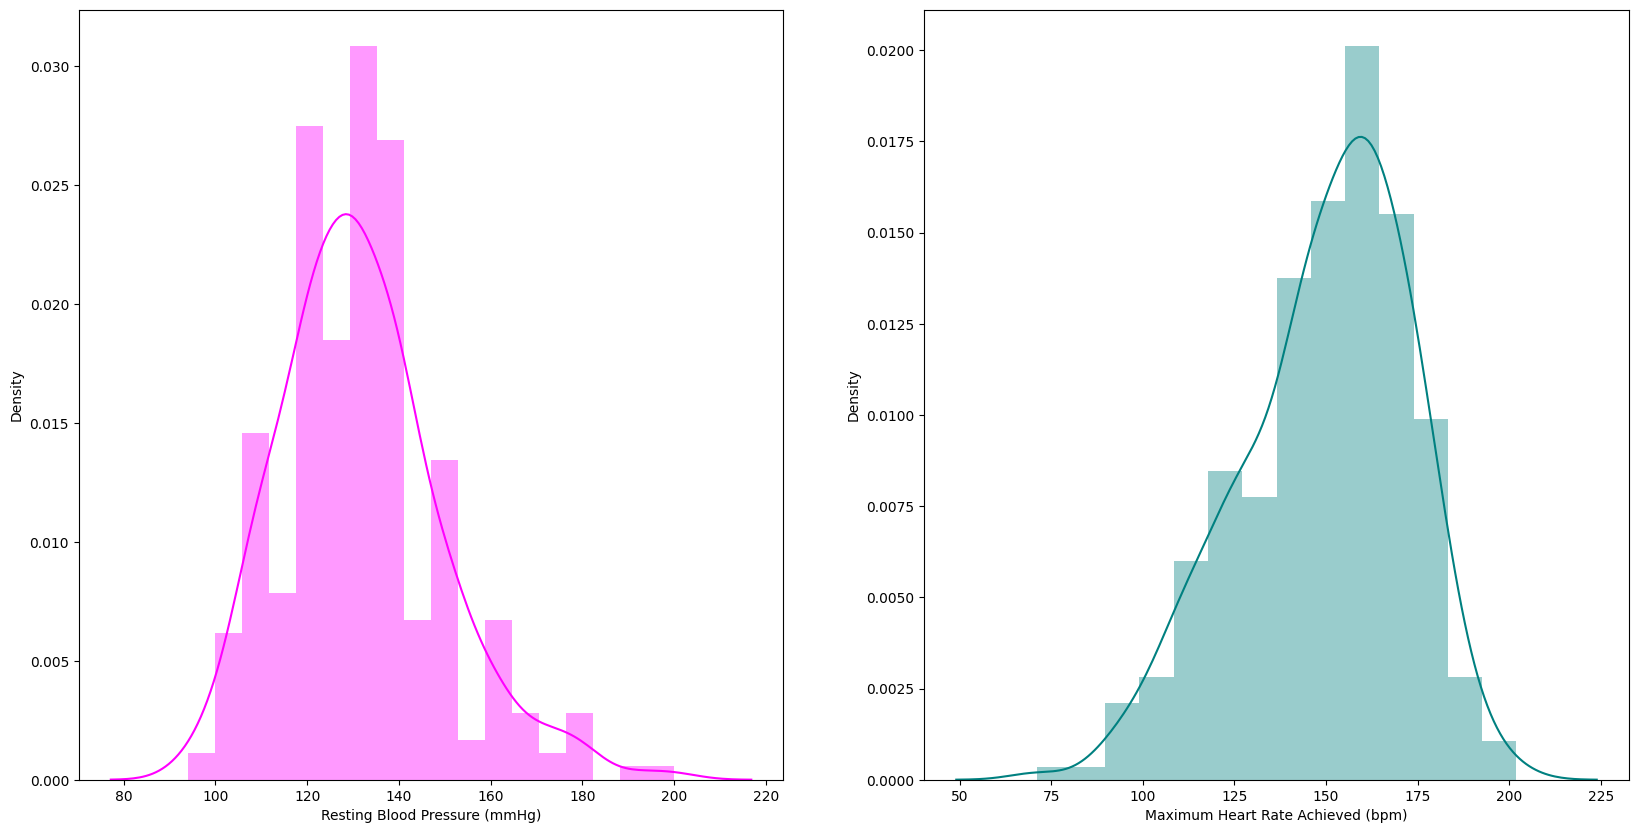

In [ ]:
#continous variable
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)")

<ipython-input-18-ebe894739d0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'], kde=True, color = 'red')


Text(0.5, 0, 'Cholestrol')

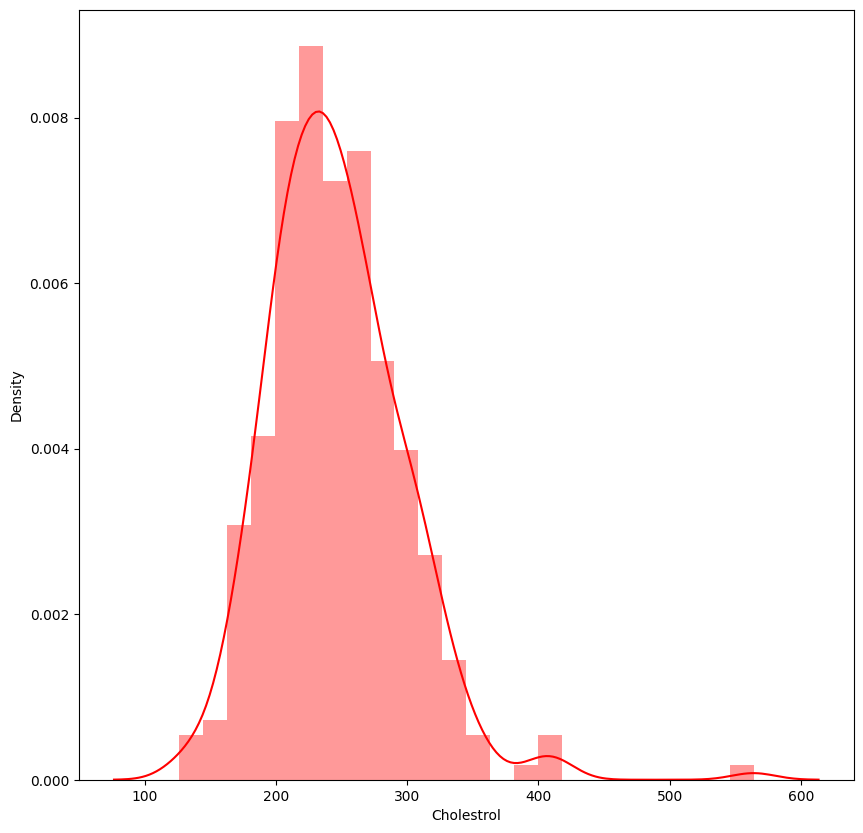

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol")

In [ ]:
df.head(10)
#data after analysis

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,0,1


In [ ]:
#standardisation of data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [ ]:
scale.fit(df)

StandardScaler()

In [ ]:
df= scale.transform(df)

In [ ]:
df=pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'])

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.714429,0.914529
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,-0.714429,0.914529
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.714429,0.914529
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.714429,0.914529
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,-0.714429,0.914529


# ML Models:
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

In [ ]:
x= df.iloc[:,:-1]
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429
...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.714429
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,-0.714429
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,1.244593
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.265082


In [ ]:
y= df.iloc[:,-1:]
y

,output
0,0.914529
1,0.914529
2,0.914529
3,0.914529
4,0.914529
...,...
298,-1.093459
299,-1.093459
300,-1.093459
301,-1.093459


In [ ]:
#split data into test and training data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbl= LabelEncoder()
encoded_y= lbl.fit_transform(y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train,encoded_y)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y_pred1 = lr.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

In [ ]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [ ]:
ypred2=tree.predict(x_test)
encoded_ytest= lbl.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2)
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

In [ ]:
tree_conf_matrix

array([[27, 17],
       [10, 37]])

In [ ]:
print(tree_acc_score*100,"%")

70.32967032967034 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [ ]:
rf.fit(x_train,encoded_y)

RandomForestClassifier()

In [ ]:
ypred3 = rf.predict(x_test)

In [ ]:
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3)
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

In [ ]:
rf_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [ ]:
print(rf_acc_score*100,"%")

81.31868131868131 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)

In [ ]:
knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4)
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

In [ ]:
knn_conf_matrix

array([[35,  9],
       [ 5, 42]])

In [ ]:
print(knn_acc_score*100,"%")

84.61538461538461 %


In [ ]:
from sklearn import svm
svm = svm.SVC()

In [ ]:
svm.fit(x_train,encoded_y)

SVC()

In [ ]:
ypred5= svm.predict(x_test)

In [ ]:
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

In [ ]:
svm_conf_matrix

array([[34, 10],
       [ 8, 39]])

In [ ]:
print(svm_acc_score*100,"%")

80.21978021978022 %


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adab= AdaBoostClassifier(base_estimator=svm,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)
adab.fit(x_train,encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

In [ ]:
ypred6=adab.predict(x_test)

In [ ]:
adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

In [ ]:
adab_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [ ]:
print(adab_acc_score*100,"%")

51.64835164835166 %


In [ ]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM',
                                    'AdaBoost Classifier'],
                         'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100
                                       ,svm_acc_score*100,adab_acc_score*100]})
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [ ]:
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,81.318681
4,SVM,80.219780
1,Decision Tree,70.329670
5,AdaBoost Classifier,51.648352


In [ ]:
#hyperparameter tuning using gridsearch cv
from sklearn.model_selection import GridSearchCV
model_acc

,Model,Accuracy
0,Logistic Regression,85.714286
3,K Nearest Neighbor,84.615385
2,Random Forest,81.318681
4,SVM,80.219780
1,Decision Tree,70.329670
5,AdaBoost Classifier,51.648352


In [ ]:
#for logistic regression
param_grid= {
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]
}

In [ ]:
grid1= GridSearchCV(LogisticRegression(),param_grid)
grid1.fit(x_train,encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
grid1.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
#apply new parameter to logistic regression model
lr1= LogisticRegression(C=0.01,penalty='l2',solver='liblinear')
lr1.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
lr_pred= lr1.predict(x_test)

In [ ]:
lr1_conf_matrix = confusion_matrix(encoded_ytest,lr_pred)
lr1_acc_score = accuracy_score(encoded_ytest, lr_pred)

In [ ]:
lr1_conf_matrix

array([[33, 11],
       [ 6, 41]])

In [ ]:
print(lr_acc_score*100,"%")

85.71428571428571 %


In [ ]:
#for knn
n_neighbors = range(1, 21, 1)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

In [ ]:
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(n_neighbors=12),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
#apply new parameters to model
knn= KNeighborsClassifier(n_neighbors=12,metric='manhattan',weights='distance')
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

In [ ]:
knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

In [ ]:
knn_pred_conf_matrix

array([[33, 11],
       [ 5, 42]])

In [ ]:
print(knn_pred_acc_score*100,"%")

82.41758241758241 %


In [ ]:
#for SVM
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

In [ ]:
#apply new parameters to the model
from sklearn.svm import SVC
svc= SVC(C= 0.1, gamma= 'scale',kernel= 'sigmoid')
svc.fit(x_train,encoded_y)

SVC(C=0.1, kernel='sigmoid')

In [ ]:
svm_pred= svc.predict(x_test)

In [ ]:
svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_conf_matrix
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

In [ ]:
print(svm_pred_acc_score*100,"%")

81.31868131868131 %


## Final Verdict
### Best Performing Model : Logistic Regression with accuracy of 85%.